In [1]:
import os
print(os.listdir('C:/Users/ntadi/Pictures'))

['ab', 'assign', 'bhumra', 'bindu', 'Camera Roll', 'chahal', 'chiru', 'desktop.ini', 'dhawan', 'dhoni', 'g', 'indu', 'koti', 'nanrayana', 'New folder', 'Pictures.rar', 'prabhas', 'ragini', 'rana', 'ravi', 'redd', 'rohit', 'sachin', 'samar', 'Saved Pictures', 'surya', 'test', 'velu', 'venkey', 'vk']


In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [5]:
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as k
from tensorflow.keras import backend
#from keras import backend as K
from tensorflow_core.python.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn


Using TensorFlow backend.


In [15]:
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [16]:
X=[]
Z=[]
IMG_SIZE=200
indu_DIR='C:/Users/ntadi/Pictures/indu'
venkey_DIR='C:/Users/ntadi/Pictures/venkey'
nanrayan_DIR='C:/Users/ntadi/pictures/nanrayana'
samar_DIR='C:/Users/ntadi/pictures/samar'

In [17]:
def assign_label(img,person):
    return person

In [22]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [23]:
make_train_data('indu',indu_DIR)
make_train_data('venkey',venkey_DIR)
make_train_data('nanrayan',nanrayan_DIR)
make_train_data('samar',samar_DIR)


print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 67.68it/s]


86


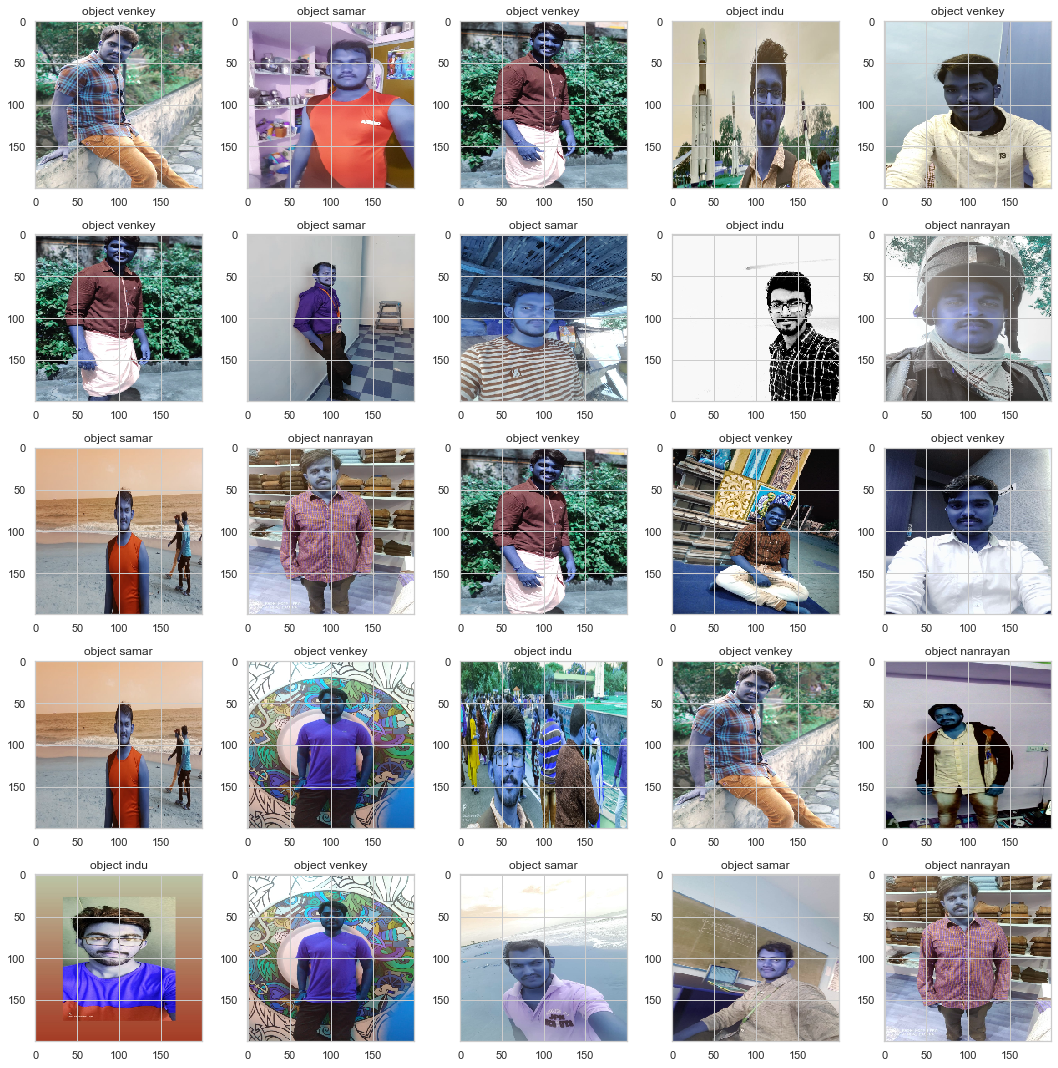

In [26]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('object '+Z[l])
        
plt.tight_layout()

In [28]:
le=LabelEncoder()
Y=list(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [30]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [31]:

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))

In [126]:
batch_size=32
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [127]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [128]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [129]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = 200, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
#model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/200
2/2 [==============================] - ETA: 3s - loss: 0.1171 - accuracy: 0.96 - 6s 3s/step - loss: 0.4431 - accuracy: 0.8594 - val_loss: 4.2072 - val_accuracy: 0.3636
Epoch 2/200
2/2 [==============================] - ETA: 2s - loss: 0.0283 - accuracy: 1.00 - 6s 3s/step - loss: 0.1873 - accuracy: 0.9375 - val_loss: 6.2841 - val_accuracy: 0.3636
Epoch 3/200
2/2 [==============================] - ETA: 2s - loss: 0.0476 - accuracy: 1.00 - 5s 2s/step - loss: 0.1657 - accuracy: 0.9531 - val_loss: 7.2725 - val_accuracy: 0.2727
Epoch 4/200
2/2 [==============================] - ETA: 2s - loss: 0.0369 - accuracy: 1.00 - 6s 3s/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 7.5518 - val_accuracy: 0.2727
Epoch 5/200
2/2 [==============================] - ETA: 1s - loss: 0.1240 - accuracy: 0.93 - 4s 2s/step - loss: 0.0680 - accuracy: 0.9688 - val_loss: 7.1863 - val_accuracy: 0.2273
Epoch 6/200
2/2 [==============================] - ETA: 2s - loss: 0.1901 - accuracy: 0.90 - 5s 3s/s

2/2 [==============================] - ETA: 2s - loss: 0.0513 - accuracy: 0.96 - 5s 3s/step - loss: 0.0514 - accuracy: 0.9688 - val_loss: 4.8522 - val_accuracy: 0.4545
Epoch 92/200
2/2 [==============================] - ETA: 2s - loss: 0.2749 - accuracy: 0.90 - 5s 2s/step - loss: 0.2374 - accuracy: 0.9375 - val_loss: 5.4554 - val_accuracy: 0.3182
Epoch 93/200
2/2 [==============================] - ETA: 2s - loss: 0.0207 - accuracy: 1.00 - 5s 2s/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 7.1319 - val_accuracy: 0.3182
Epoch 94/200
2/2 [==============================] - ETA: 1s - loss: 0.0056 - accuracy: 1.00 - 5s 2s/step - loss: 0.0426 - accuracy: 0.9844 - val_loss: 8.4590 - val_accuracy: 0.3182
Epoch 95/200
2/2 [==============================] - ETA: 2s - loss: 0.1617 - accuracy: 0.96 - 5s 2s/step - loss: 0.1272 - accuracy: 0.9688 - val_loss: 7.8553 - val_accuracy: 0.3182
Epoch 96/200
2/2 [==============================] - ETA: 1s - loss: 0.0115 - accuracy: 1.00 - 5s 2s/step - l

2/2 [==============================] - ETA: 1s - loss: 0.1202 - accuracy: 0.96 - 5s 2s/step - loss: 0.1058 - accuracy: 0.9531 - val_loss: 6.2515 - val_accuracy: 0.2727
Epoch 182/200
2/2 [==============================] - ETA: 2s - loss: 0.0038 - accuracy: 1.00 - 5s 2s/step - loss: 0.0249 - accuracy: 0.9844 - val_loss: 5.4438 - val_accuracy: 0.3636
Epoch 183/200
2/2 [==============================] - ETA: 2s - loss: 0.0829 - accuracy: 0.93 - 5s 3s/step - loss: 0.2287 - accuracy: 0.9062 - val_loss: 5.5226 - val_accuracy: 0.4091
Epoch 184/200
2/2 [==============================] - ETA: 2s - loss: 0.2842 - accuracy: 0.87 - 5s 3s/step - loss: 0.1496 - accuracy: 0.9375 - val_loss: 8.0440 - val_accuracy: 0.3182
Epoch 185/200
2/2 [==============================] - ETA: 1s - loss: 0.2371 - accuracy: 0.93 - 5s 2s/step - loss: 0.2621 - accuracy: 0.9062 - val_loss: 7.5240 - val_accuracy: 0.3182
Epoch 186/200
2/2 [==============================] - ETA: 2s - loss: 0.2047 - accuracy: 0.93 - 5s 2s/ste

In [45]:
model.save_weights('model_wieghts.h5')
model.save('mymodel.h5')

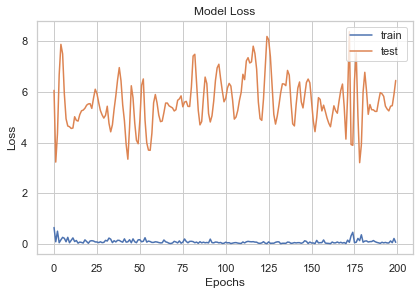

In [106]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

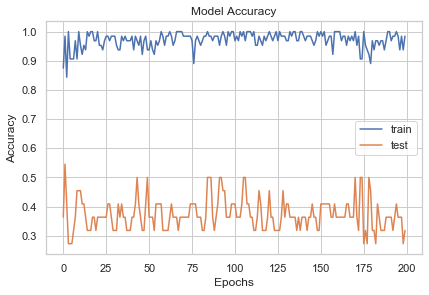

In [107]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [108]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [109]:
CATAGORIES=['indu','venkey','narayana','samar']

In [110]:
def prepare (filepath):
    IMG_SIZE=200;
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-3,IMG_SIZE,IMG_SIZE,3)


In [122]:
prediction=model.predict([prepare('indu.jpeg')])
pred_digits=np.argmax(prediction,axis=1)

In [123]:
prediction

array([[0., 0., 1., 0.]], dtype=float32)

In [124]:
pred_digits

array([2], dtype=int64)

In [125]:
str(le.inverse_transform([pred_digits]))

"['samar']"

In [115]:
prediction=model.predict([prepare('venkey.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))

"['venkey']"

In [116]:
prediction=model.predict([prepare('narayana.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))

"['venkey']"

In [117]:
prediction=model.predict([prepare('samar.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))

"['venkey']"

In [118]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [119]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==12):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==12):
        break

IndexError: list index out of range

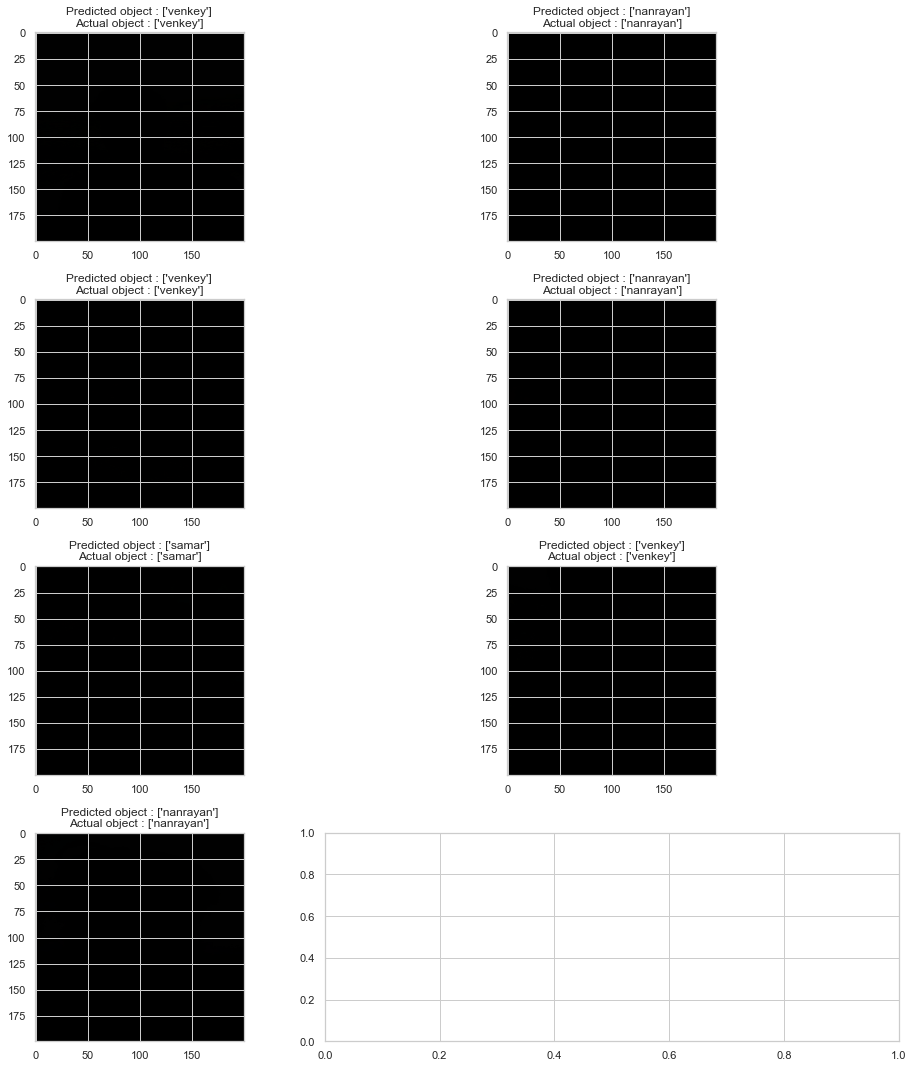

In [120]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

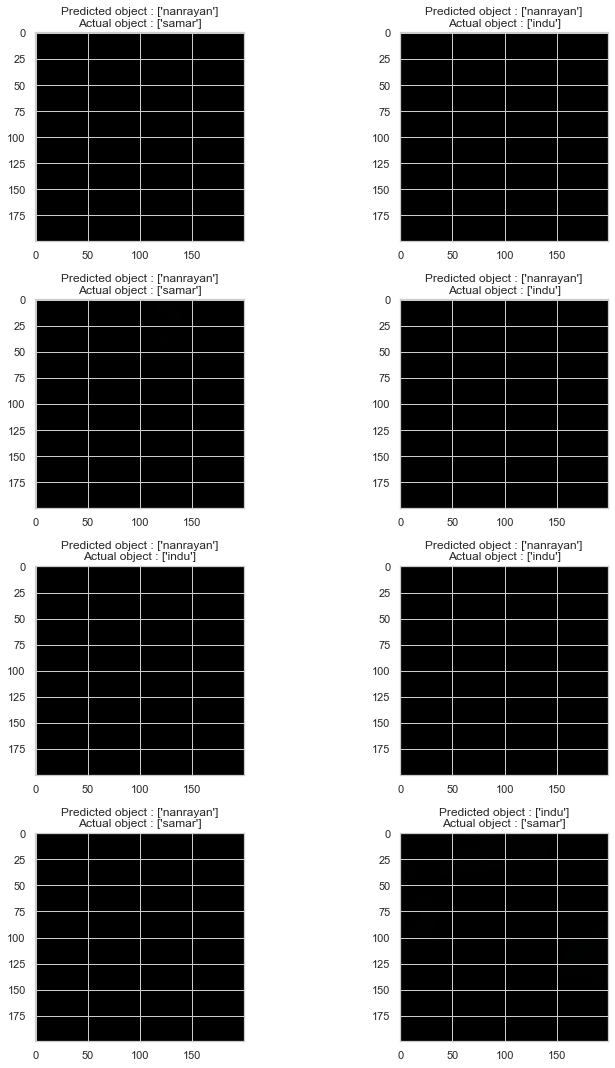

In [121]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [ ]:
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
